In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [2]:
# Reading data file
df = pd.read_csv('C:\\Users\\tkaly\\OneDrive\\Desktop\\Docs\\UpGrad\\Machine Learning-1\\Linear Regression Assignment\\day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


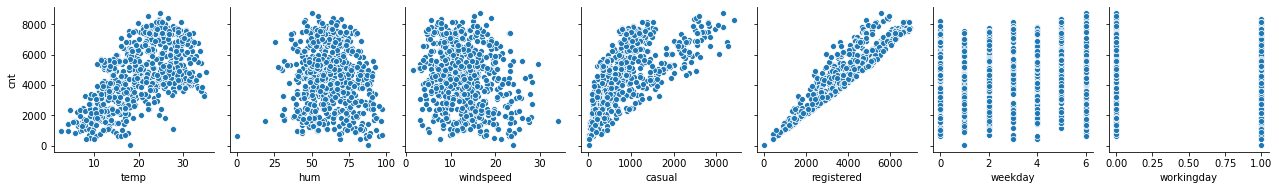

In [4]:
# Pair plot with target variable
sns.pairplot(y_vars=['cnt'],x_vars=['temp','hum','windspeed','casual','registered','weekday','workingday' ],data=df)

In [5]:
# Extracrting date from dteday
df['date'] = df.dteday.astype(str).apply(lambda x : x[0:2])
df['date'] = df['date'].astype(float)

In [6]:
# Dropping dteday as we have extracted date, month and year from data 
df = df.drop('dteday',axis=1)
# atemp is relational to temp, so deleting this
df = df.drop('atemp',axis=1)
# Droping instant as it will not help in prediction
df = df.drop('instant',axis=1)
# holiday column can be well identified from workingday
df = df.drop('holiday',axis=1)

In [7]:
df.dtypes

season          int64
yr              int64
mnth            int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
date          float64
dtype: object

In [8]:
# Creating dummies for season and weathersit as it carries categorical data
df = pd.get_dummies(df,columns=['season','weathersit'],drop_first=True)

In [9]:
# Describe dataset
df.describe()

,yr,mnth,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date,season_2,season_3,season_4,weathersit_2,weathersit_3
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,2.997260,0.683562,20.319259,62.765175,12.763620,849.249315,3658.757534,4508.006849,15.720548,0.252055,0.257534,0.243836,0.336986,0.028767
std,0.500343,3.450215,2.006161,0.465405,7.506729,14.237589,5.195841,686.479875,1559.758728,1936.011647,8.802278,0.434490,0.437576,0.429689,0.473004,0.167266
min,0.000000,1.000000,0.000000,0.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,1.000000,0.000000,13.811885,52.000000,9.041650,316.250000,2502.250000,3169.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,3.000000,1.000000,20.465826,62.625000,12.125325,717.000000,3664.500000,4548.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,5.000000,1.000000,26.880615,72.989575,15.625589,1096.500000,4783.250000,5966.000000,23.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,6.000000,1.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Separating dataset with test and train with ratio 70 : 30 respectively
df_train, df_test = train_test_split(df,train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 16)
(220, 16)


In [11]:
df.head()

,yr,mnth,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,6,0,14.110847,80.5833,10.749882,331,654,985,1.0,0,0,0,1,0
1,0,1,0,0,14.902598,69.6087,16.652113,131,670,801,2.0,0,0,0,1,0
2,0,1,1,1,8.050924,43.7273,16.636703,120,1229,1349,3.0,0,0,0,0,0
3,0,1,2,1,8.200000,59.0435,10.739832,108,1454,1562,4.0,0,0,0,0,0
4,0,1,3,1,9.305237,43.6957,12.522300,82,1518,1600,5.0,0,0,0,0,0


In [12]:
# 1. Initiate an object
scaler = MinMaxScaler()

# create a list of numeric vars
num_vars = ['mnth', 'weekday', 'temp', 'hum', 'windspeed', 'casual','registered','date','cnt']

# 2. fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

<ipython-input-12-92b5cadfa526>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\tkaly\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-12-92b5cadfa526>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,yr,mnth,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date,season_2,season_3,season_4,weathersit_2,weathersit_3
576,1,0.545455,0.333333,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,1.000000,0,1,0,0,0
426,1,0.181818,1.000000,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,0.066667,0,0,0,1,0
728,1,1.000000,0.000000,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,0.966667,0,0,0,0,0
482,1,0.272727,1.000000,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0.900000,1,0,0,1,0
111,0,0.272727,0.833333,1,0.345824,0.751824,0.380981,0.053337,0.214554,0.191095,0.700000,1,0,0,1,0


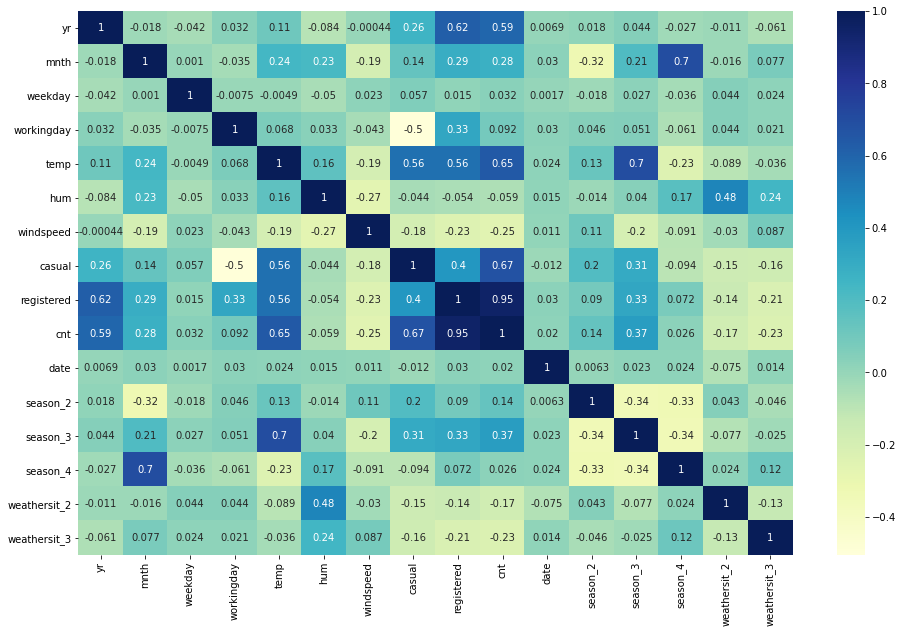

In [13]:
# Heatmap to find co relation among the columns
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [14]:
# Separating X_train and y_train with target variable 
y_train = df_train.pop('cnt')
X_train = df_train

In [15]:
# VIF to find colinearity among parameters
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,registered,43.19
4,temp,33.56
5,hum,19.04
1,mnth,13.88
3,workingday,9.77
7,casual,9.43
11,season_3,8.27
12,season_4,7.89
0,yr,6.06
6,windspeed,4.06


In [16]:
# Building new model taking all parameters in the dataset
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const          -2.775558e-17
yr              5.585810e-16
mnth           -2.953367e-16
weekday        -6.938894e-17
workingday      1.318390e-16
temp            3.677614e-16
hum             7.771561e-16
windspeed       2.081668e-16
casual          3.774735e-01
registered      7.968247e-01
date           -5.551115e-17
season_2       -1.752071e-16
season_3        4.440892e-16
season_4        2.428613e-16
weathersit_2    6.106227e-16
weathersit_3    1.734723e-17
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.020e+30
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:41:06   Log-Likelihood:                 16768.
No. Observations:                 510   AIC:   

,Features,VIF
0,const,56.78
9,registered,6.94
12,season_3,6.16
13,season_4,5.99
5,temp,5.03
2,mnth,3.92
8,casual,3.89
4,workingday,3.27
1,yr,2.99
11,season_2,2.99


1. date having high P value and low VIF
2. registered having low P value and high VIF

In [17]:
# Removing column having high P value thats date
X_train = X_train.drop('date',axis=1)
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           5.551115e-17
yr             -1.249001e-16
mnth           -4.078769e-16
weekday        -2.081668e-17
workingday      4.388850e-16
temp           -1.387779e-17
hum             1.110223e-15
windspeed       4.857226e-16
casual          3.774735e-01
registered      7.968247e-01
season_2       -2.185752e-16
season_3        5.342948e-16
season_4        3.972517e-16
weathersit_2    2.133710e-16
weathersit_3    1.144917e-16
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.503e+29
Date:                Sat, 02 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:41:06   Log-Likelihood:                 16541.
No. Observations:                 510   AIC:                        -3.305e+

,Features,VIF
0,const,55.17
9,registered,6.94
11,season_3,6.14
12,season_4,5.98
5,temp,5.03
2,mnth,3.92
8,casual,3.89
4,workingday,3.27
1,yr,2.99
10,season_2,2.98


After removing date from mode, it destabilize the model giving max column value as high.
So, Need to add it again

In [18]:
# Model after removing registered column
X_train['date'] = df_train['date']
X_train = X_train.drop('registered',axis=1)
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           0.053755
yr              0.184759
mnth            0.030762
weekday         0.024725
workingday      0.159511
temp            0.227472
hum            -0.065515
windspeed      -0.090326
casual          0.561908
season_2        0.059372
season_3        0.052004
season_4        0.115256
weathersit_2   -0.038709
weathersit_3   -0.178515
date           -0.003637
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     339.3
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          3.57e-243
Time:                        13:41:07   Log-Likelihood:                 640.84
No. Observations:                 510   AIC:                            -1252.
Df Residuals:                     495   BIC:             

,Features,VIF
0,const,56.17
10,season_3,6.05
11,season_4,5.47
5,temp,4.48
2,mnth,3.90
8,casual,3.59
9,season_2,2.85
4,workingday,2.10
6,hum,1.93
12,weathersit_2,1.61


Removing registered seems significant as it reduces the P value of most independent variable and stabilizing the model

In [19]:
# Removing date as per highest p value in the model
X_train = X_train.drop('date',axis=1)
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           0.052407
yr              0.184706
mnth            0.030916
weekday         0.024667
workingday      0.159502
temp            0.227674
hum            -0.066179
windspeed      -0.090554
casual          0.562197
season_2        0.059131
season_3        0.051654
season_4        0.114961
weathersit_2   -0.038412
weathersit_3   -0.178268
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     366.1
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          1.94e-244
Time:                        13:41:07   Log-Likelihood:                 640.78
No. Observations:                 510   AIC:                            -1254.
Df Residuals:                     496   BIC:                            -1194.
Df 

,Features,VIF
0,const,54.59
10,season_3,6.03
11,season_4,5.46
5,temp,4.47
2,mnth,3.90
8,casual,3.59
9,season_2,2.84
4,workingday,2.10
6,hum,1.92
12,weathersit_2,1.60


Now model is getting more stabilized

In [20]:
# mnth is having high P value and VIF as well. so removing mnt from model
X_train = X_train.drop('mnth',axis=1)
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           0.055162
yr              0.184499
weekday         0.025556
workingday      0.158665
temp            0.230411
hum            -0.062046
windspeed      -0.090175
casual          0.560044
season_2        0.063375
season_3        0.064124
season_4        0.136521
weathersit_2   -0.039201
weathersit_3   -0.180408
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     395.1
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          3.38e-245
Time:                        13:41:07   Log-Likelihood:                 639.48
No. Observations:                 510   AIC:                            -1253.
Df Residuals:                     497   BIC:                            -1198.
Df Model:                   

,Features,VIF
0,const,54.28
9,season_3,4.79
4,temp,4.46
7,casual,3.58
8,season_2,2.71
3,workingday,2.09
5,hum,1.91
10,season_4,1.90
11,weathersit_2,1.59
12,weathersit_3,1.28


Though P value of the independent variables are good but VIF is high. So trying to remove parameter having highest VIF(temp)

In [21]:
# Removing temp from model
X_train = X_train.drop('temp',axis=1)
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           0.058551
yr              0.181486
weekday         0.021601
workingday      0.184895
hum            -0.000961
windspeed      -0.070872
casual          0.664778
season_2        0.103079
season_3        0.149481
season_4        0.154898
weathersit_2   -0.047930
weathersit_3   -0.186142
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     378.1
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          1.31e-233
Time:                        13:41:07   Log-Likelihood:                 608.96
No. Observations:                 510   AIC:                            -1194.
Df Residuals:                     498   BIC:                            -1143.
Df Model:                          11                

,Features,VIF
0,const,54.26
6,casual,2.81
8,season_3,2.46
7,season_2,2.22
3,workingday,1.84
9,season_4,1.80
4,hum,1.78
10,weathersit_2,1.56
11,weathersit_3,1.28
5,windspeed,1.24


VIF of the parameters are in good stage now. How ever hum seems in significant as P value is high

In [22]:
# Removing hum from model
X_train = X_train.drop('hum',axis=1)
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)

lr_model = lr.fit()

print(lr_model.params)
print(lr_model.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           0.057936
yr              0.181506
weekday         0.021632
workingday      0.184894
windspeed      -0.070672
casual          0.664766
season_2        0.103043
season_3        0.149437
season_4        0.154839
weathersit_2   -0.048082
weathersit_3   -0.186407
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     416.7
Date:                Sat, 02 Jan 2021   Prob (F-statistic):          6.25e-235
Time:                        13:41:07   Log-Likelihood:                 608.96
No. Observations:                 510   AIC:                            -1196.
Df Residuals:                     499   BIC:                            -1149.
Df Model:                          10                                         

,Features,VIF
0,const,19.96
5,casual,2.81
7,season_3,2.43
6,season_2,2.20
3,workingday,1.84
8,season_4,1.74
1,yr,1.18
4,windspeed,1.14
10,weathersit_3,1.10
9,weathersit_2,1.08


This model is best stabilized among all previous. Having less P value and VIF of approx 2 for all parameters. Also R squared value is approx 89%

In [23]:
# Predict train data
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

576    0.757999
426    0.388237
728    0.265924
482    0.529234
111    0.324350
580    0.852539
500    0.726391
479    0.658879
472    0.540930
455    0.749780
636    0.911914
224    0.459544
458    0.731084
244    0.524258
627    0.766514
595    0.578437
140    0.627798
454    0.750188
162    0.439381
231    0.606952
688    0.639951
659    0.744589
696    0.604099
320    0.351799
534    0.714251
136    0.406255
568    0.792293
474    0.800157
206    0.527032
427    0.338486
288    0.530159
447    0.502064
259    0.448670
174    0.578913
267    0.475891
327    0.321261
402    0.455497
590    0.789850
609    0.866506
704    0.641955
376    0.423705
365    0.355259
15     0.086184
656    0.687203
639    0.453950
470    0.551566
561    0.778895
680    0.599809
591    0.807545
240    0.525315
597    0.794971
718    0.595030
115    0.446871
565    0.669341
154    0.548604
471    0.699421
241    0.543530
552    0.685064
651    0.779403
384    0.392799
315    0.466539
484    0.597583
354    0

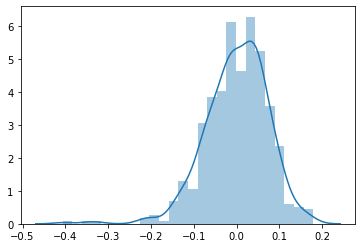

In [24]:
# Residual analysis of the train values
res = y_train - y_train_pred
sns.distplot(res)

In [25]:
# Creating X_test and y_test for prediction test purpose
X_test = df_test[['yr','weekday','workingday','windspeed','casual','season_2','season_3','season_4','weathersit_2','weathersit_3']]
y_test = df_test.pop('cnt')

In [26]:
# add a constant to test data
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,yr,weekday,workingday,windspeed,casual,season_2,season_3,season_4,weathersit_2,weathersit_3
184,1.0,0,0.166667,0,0.149393,0.898559,0,1,0,1,0
535,1.0,1,0.500000,1,0.231142,0.253749,1,0,0,0,0
299,1.0,0,0.666667,1,0.443398,0.067921,0,0,1,1,0
221,1.0,0,0.500000,1,0.449707,0.257277,0,1,0,0,0
152,1.0,0,0.666667,1,0.682387,0.213761,1,0,0,0,0
404,1.0,1,0.666667,1,0.433978,0.045281,0,0,0,0,0
198,1.0,0,0.166667,1,0.489012,0.244634,0,1,0,0,0
171,1.0,0,0.333333,1,0.375796,0.224934,0,1,0,1,0
512,1.0,1,0.166667,0,0.440258,0.749191,1,0,0,0,0
200,1.0,0,0.500000,1,0.231154,0.186710,0,1,0,0,0


In [27]:
# Lets predict test date
y_test_pred = lr_model.predict(X_test_sm)

In [28]:
# R square score for test data
r2_score(y_test,y_test_pred)

0.8604597902598847

For train data R squared value was near 89%. For test data R squared value is near 86%. Which is quite close predictions